# Weighted Graphs

**Prerequisites**

- Introduction to Graphs
- Strong and Weak Ties

**Outcomes**

- Know what a weighted graph is and how to construct them using `networkx`
- Implement the shortest path algorithm for traversing a weighted graph

**References**

- [Easley and Kleinberg](https://www.cs.cornell.edu/home/kleinber/networks-book/) chapter 5 (especially section 5.1-5-3)

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Weighted Graphs

- So far we have considered a few types of graphs
  - Undirected graph: nodes $A$ and $B$ are connected by an edge 
  - Directed graph: connection from node $A$ to node $B$
  - Strong/weak graphs: each edge is labeled as strong or weak
- Today we extend our understanding of networks to talk about *weighted graphs*
  - Each edge is assigned a `float` denoting the strength of tie
  - Ties can be positive (friends) or negative (enemies)
  - Can also very in strength (+2.0 better friends than +0.2)

## Weighted Adjacency Matrix

- In a simple (unweighted) graph, we used a matrix of 0's and 1's as an adjacency matrix
  - A 1 in row i column j marked an edge between i and j (or from i->j for directed)
  - A 0 marked lack of an edge

array([[0., 1., 1., 1.],
       [1., 0., 1., 1.],
       [1., 1., 0., 1.],
       [1., 1., 1., 0.]])

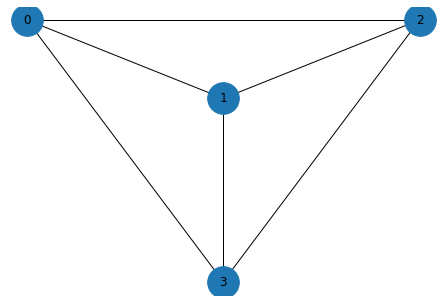

In [2]:
g1 = nx.complete_graph(4, )
g1_pos = pos={0: (1, 1), 1:  (2, 0.7), 2: (3, 1), 3: (2, 0)}
nx.draw(g1, pos=g1_pos, with_labels=True, node_size=1000)
nx.convert_matrix.to_numpy_array(g1)

- We can extend idea of adjacency matrix to include *weighted* edges
- Suppose nodes A, B, C are friends -- but A-C are **best** friends
- Also suppose that all of A, B, C consider D an enemy
- To represent this we might say weight of edges is:
  - `A-B` and `B-C`: 1.0
  - `A-C`: 2.0
  - `A-D`, `B-D`, `C-D`: -1.0
- Here's the adjacency matrix

In [3]:
A2 = np.array([
    [0, 1, 2, -1],
    [1, 0, 1, -1],
    [2, 1, 0, -1],
    [-1, -1, -1, 0],
])
A2

array([[ 0,  1,  2, -1],
       [ 1,  0,  1, -1],
       [ 2,  1,  0, -1],
       [-1, -1, -1,  0]])

In [4]:
G2 = nx.Graph(A2)

- And here is how we might visualize this graph (notice the labeled edges)

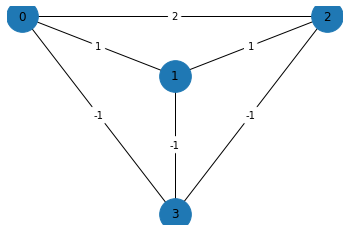

In [5]:
def draw_weighted_graph(g, pos):
    
    fig, ax = plt.subplots()
    labels = dict(
        [
            ((n1, n2), d['weight'])
            for n1, n2, d in g.edges(data=True)
        ]
    )
    ax = nx.draw(g, pos=pos, with_labels=True, node_size=1000, ax=ax)
    nx.draw_networkx_edge_labels(g, ax=ax, pos=pos, edge_labels=labels, rotate=False)
    return ax

draw_weighted_graph(G2, g1_pos)

# Shortest Paths

- We talked previously about shortest paths for a Graph
- This was defined as the minimum number of edges needed to move from node n1 to node n2
- When we have a weighted graph things get more interesting...
- Let $w_{ab}$ represent the weight connecting nodes $A$ and $B$
- Define the shortest path between n1 and n2 as the path that minimizes $\sum w_{ab}$ for all edges `A->B` along a path

## Example

- Consider the following directed graph

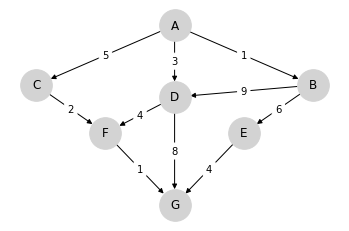

In [6]:
G3 = nx.read_gml("short_path_problem.gml")

edge_labels = dict(
    [
        ((u, v), d['weight'])
        for u, v, d in G3.edges(data=True)
    ]
)
pos = nx.get_node_attributes(G3,'pos')

nx.draw_networkx_edge_labels(G3, pos, edge_labels=edge_labels, rotate=False)
nx.draw(G3, pos, node_color='lightgrey', with_labels=True, node_size=1000)

- We wish to travel from node A to node G at minimum cost
- The shortest path (ignoring weights)  is A-D-G
- Taking into account weights we have 3 + 8 = 11
- There are two other paths that lead to lower cost (total of 8)
  - `A-C-F-G` has cost 5 + 2 + 1 = 8
  - `A-D-F-G` has cost 3 + 4 + 1 = 8
- For this small graph, we could find these paths by hand
- For a larger one, we will need an algorithm...

## Shortest path algorithm

- Let $J(v)$ be the minimum cost-to-go from node $v$ to node G
- Suppose that we know $J(v)$ for each node $v$, as shown below for our example graph
  - Note $J(G) = 0$

![https://github.com/sglyon/ucf-cap-6318/raw/Fall21/notebooks/week04/graph_costs.png](https://github.com/sglyon/ucf-cap-6318/raw/Fall21/notebooks/week04/graph_costs.png)

- With $J(v)$ in hand, the following algorithm will find the cost-minimizing path from $A$ to $G$:
  1. Start with $v = A$
  2. From current node $v$ move to any node that solves $\min_{n \in F_v} w_{vn} + J(n)$, where $F_v$ is the set of nodes that can be reached from $v$. 
  3. Update notation to set $v = n$
  3. Repeat steps 2-3 (making note of which we visit) until $v = G$

## Exercise: Traversing Cost-Minimizing Path

- Let's implement the algorithm above
- Below I have started a function called `traverse_graph`
- Your task is to complete it until you get that the minimum cost path has a cost of 8 and length(4)

In [8]:
J3 = {
    "A": 8, 
    "B": 10, 
    "C": 3, 
    "D": 5, 
    "E": 4, 
    "F": 1, 
    "G": 0,
}

In [10]:
type(G3)

networkx.classes.digraph.DiGraph

In [ ]:
def traverse_graph(
        G: nx.DiGraph, 
        J: dict, 
        start_node, 
        end_node
    ):
    path = [start_node]
    cost = 0.0
    W = G.adj
    
    # NOTE: modify the lines that say CHANGE ME below
    # TODO: step1, initialize v
    v = 'A'  # CHANGE ME
    num = 0
    while v != end_node and num < len(G.nodes):  # prevent infinite loop
        num +=1
        F_v = list(G.neighbors(v))
        
        # TODO: step 2, compute costs for all n in F_v
        #       Use W[v][n]["weight"] and J to get weight from v -> n
        costs = [0 for n in F_v]  # CHANGE ME
        
        n = F_v[np.argmin(costs)]
        
        # TODO: how should we update cost?
        cost += 0   # CHANGE ME
        
        path.append(n)
        
        # TODO: step 3 -- update v
        v = end_node  # CHANGE ME
    

    return path, cost

In [ ]:
traverse_graph(G3, J3, "B", "G")

In [ ]:
ans = traverse_graph(G3, J3, "A", "G")
assert ans[0] in ("A D F G".split(), "A C F G".split())
assert ans[1] == 8.0

ans2 = traverse_graph(G3, J3, "B", "G")
assert ans2[0] == "B E G".split()
assert ans2[1] == 10.0

## But what about $J(v)$

- The shortest path algorithm we presented above sounds simple, but assumed we know $J(v)$ 
- How can we find it?
- If you stare at the following equation long enough, you'll be convinced that $J$ satisfies
$$J(v) = \min_{n \in F_v} w_{vn} + J(n)$$
- This is known as the *Bellman equation*
- It is a restriction that $J$ must satisfy
- We'll use this restriction to compute $J$

## Computing J: Guess and Iterate

- We'll present the standard algorithm for computing $J(v)$
- This is an iterative method
- Let $i$ represent the iteration we are on and $J_i(v)$ be the guess for $J(v)$ on iteration $i$
- Algorithm
  1. Set $i=0$, and $J_i(v) = 0 \forall v$
  2. Set $J_{i+1}(v) = \min_{n \in F_v} w_{vn} + J_i(n) \forall n$
  3. Check if $J_{i+1}$ and $J_i$ are equal for all $v$ -- if not set $i = i+1$ and see repeat steps 2-3
- This algorithm converges to $J$ (we won't prove it here...)

## Implementation

- Let's now implement the algorithm!
- We'll walk you through our implementation

In [11]:
def compute_J(G: nx.DiGraph, dest_node):
    nodes = G.nodes
    N = len(nodes)
    node_to_ind = dict(zip(nodes, range(N)))
    ind_to_node = {v: k for k, v in node_to_ind.items()}
    
    # step 1. start with zeros
    i = 0
    Ji = np.zeros(N)
    next_J = np.zeros(N)
    
    W = nx.to_numpy_array(G)
    
    done = False
    while not done:
        i += 1
        for v in G.nodes:
            i = node_to_ind[v]
            if v == dest_node:
                next_J[i] = 0
                continue
            F_v = list(G.neighbors(v))
            js = [node_to_ind[n] for n in F_v]
            costs = [W[i, j] + Ji[j] for j in js]
            next_J[i] = min(costs)
        done = np.allclose(next_J, Ji)
        Ji = np.copy(next_J)
        
        
    return Ji

In [13]:
J3

{'A': 8, 'B': 10, 'C': 3, 'D': 5, 'E': 4, 'F': 1, 'G': 0}

In [12]:
compute_J(G3, "G")

array([ 8., 10.,  3.,  5.,  4.,  1.,  0.])

## Exercise: Shortest Path

- Let's now combine the two functions to compute a shortest path (and associated cost) for a graph
- Your task is to fill in the function below and get the test to pass

In [ ]:
def shortest_path(G: nx.DiGraph, start_node, end_node):
    """
    Given a weighted graph `G`, enumerate a shortest path 
    between `start_node` and `end_node`
    """
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
out = shortest_path(G3, "A", "G")
assert len(out) == 2
assert out[0] == "A C F G".split() or out[0] == "A D F G".split()
assert out[1] == 8

### Summary

- Weighted graphs allow us to analyze the cost of travsersing paths
    - Applied in situations like traffic flows (on physical roads/bridges), resource planning, supply chain, international trade (weights as tarrifs), and more
- Programming skills...
    - We built up an algorithm `shortest_path` using two smaller routines: `traverse_graph`, `compute_J`
    - For each of the 3 functions we were able to write tests to verify code correctness
    - Good habit to break a hard problem into smaller sub-problems that can be implemented/tested separately
    - Then compose overall routine using functions for sub-problems
    - Not all practitioners do this... we've seen some *scary* notebooks and scripts... don't do that... you know better